# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
`pd.read_csv()`

### Initial examination and adaptations
`<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
`<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
`ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
`<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isnull(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts(normalize=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)`

### Examining individual data items, rows and columns
`<pd.df>.sample()`
Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
`<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

### Grouping and sorting data
`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
`<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
`<pd.df>.sort_values(by='<column name>', ascending=False/True)`
`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
`<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


### Data transformations
`<pd.df>.describe()`
`pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
`<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
`sb.heatmap()`
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_histogram, theme_xkcd

In [ ]:
# %run "import_packages.ipynb"

## Introducing The Beatles dataset

### Read The Beatles songs *csv* file
`pd.read_csv()` returns a `pd.DataFrame` object.

In [2]:
# Get the songs as a pd.DataFrame object from 'data/The Beatles songs dataset, v1.csv'
songs  = pd.read_csv('data/The Beatles songs dataset, v1.csv')

### Explore the dataset (first steps)

##### Initial examination and adaptations
`<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
`<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
`ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

`<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, **<u>`<pd.df>.info()`**</u>, `<pd.df>.describe()` (shows descriptive statistics for numerical columns only).

In [12]:
display(songs)
display(songs.shape)
display(songs.head())
display(songs.tail())
display(songs.sample(10))
display(songs.dtypes)
display(songs.info())
display(songs.describe())
display(songs[['Other.releases', 'Duration']].describe())

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


(310, 9)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1


,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1
309,Your Mother Should Know,1967,Magical Mystery Tour,149,13,"Music Hall, Vaudeville Rock, Psychedelic Pop, ...",McCartney,McCartney,-1


,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
27,Because,1969,Abbey Road,165,11,Pop/Rock,Lennon,"Lennon, McCartney, Harrison",-1
142,If You've Got Trouble,1965,Anthology 2,169,0,"Rock, Pop/Rock",Lennon and McCartney,Starkey,-1
57,Don't Bother Me,1963,UK: With the Beatles US: Meet The Beatles!,149,11,"Rock and Roll, Pop/Rock",Harrison,Harrison,-1
82,Good Day Sunshine,1966,Revolver,129,7,"Sunshine Pop, Music Hall, Pop/Rock",McCartney,McCartney,-1
124,I'll Cry Instead,1964,UK: A Hard Day's Night US: Something New,129,14,"Rock and Roll, Country, Pop/Rock",Lennon,Lennon,43
259,The Inner Light,1968,UK: Rarities US: Rarities,156,10,"Indian Music, Raga Rock, Pop/Rock",Harrison,Harrison,-1
17,Any Time at All,1964,UK: A Hard Day's Night US: Something New,133,15,Pop/Rock,"Lennon, with McCartney","Lennon, with McCartney",-1
265,There's a Place,1963,UK: Please Please Me US: Rarities,109,24,"Merseybeat, Rock and Roll, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
49,Day Tripper,1965,UK: A Collection of Beatles Oldies US: Yesterd...,170,20,"Rock, Pop/Rock","Lennon, with McCartney",Lennon and McCartney,29
274,Tomorrow Never Knows,1966,Revolver,178,14,"Psychedelic Rock, Hard Rock, Avant-Pop, Experi...",Lennon,Lennon,-1


Title               object
Year                 int64
Album.debut         object
Duration             int64
Other.releases       int64
Genre               object
Songwriter          object
Lead.vocal          object
Top.50.Billboard     int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             310 non-null    object
 1   Year              310 non-null    int64 
 2   Album.debut       288 non-null    object
 3   Duration          310 non-null    int64 
 4   Other.releases    310 non-null    int64 
 5   Genre             306 non-null    object
 6   Songwriter        310 non-null    object
 7   Lead.vocal        302 non-null    object
 8   Top.50.Billboard  310 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 21.9+ KB


None

,Year,Duration,Other.releases,Top.50.Billboard
count,310.000000,310.000000,310.000000,310.000000
mean,1965.429032,159.645161,10.422581,3.158065
std,2.721090,53.995774,10.197665,11.215635
min,1958.000000,23.000000,0.000000,-1.000000
25%,1963.000000,133.000000,0.000000,-1.000000
50%,1965.000000,150.000000,9.000000,-1.000000
75%,1968.000000,172.750000,16.000000,-1.000000
max,1980.000000,502.000000,56.000000,50.000000


,Other.releases,Duration
count,310.000000,310.000000
mean,10.422581,159.645161
std,10.197665,53.995774
min,0.000000,23.000000
25%,0.000000,133.000000
50%,9.000000,150.000000
75%,16.000000,172.750000
max,56.000000,502.000000


`<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()`, `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [18]:
# Get the columns as a pd.Index object
display(songs.columns)
# Get the columns as a list
display(songs.columns.tolist())
# Get the columns as a numpy.ndarray object, using <pd.df>.columns.values or np.array(<pd.df>.columns)
display(songs.columns.values)
# Get the columns as a list from a numpy.ndarray object using <numpy.ndarray object>.tolist()
display(songs.columns.values.tolist())
# Get the values of all items in the dataset as a numpy.ndarray of lists of the values in each item, using <pd.df>.values (the type is numpy.ndarray)
display(songs.values)

Index(['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases', 'Genre',
       'Songwriter', 'Lead.vocal', 'Top.50.Billboard'],
      dtype='object')

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

array(['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases',
       'Genre', 'Songwriter', 'Lead.vocal', 'Top.50.Billboard'],
      dtype=object)

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

array([['12-Bar Original', 1965, 'Anthology 2', ...,
        'Lennon, McCartney, Harrison and Starkey', nan, -1],
       ['A Day in the Life', 1967,
        "Sgt. Pepper's Lonely Hearts Club Band", ...,
        'Lennon and McCartney', 'Lennon and McCartney', -1],
       ["A Hard Day's Night", 1964,
        "UK: A Hard Day's Night US: 1962-1966", ..., 'Lennon',
        'Lennon, with McCartney', 8],
       ...,
       ["You've Really Got a Hold on Me", 1963,
        'UK: With the Beatles US: The Beatles Second Album', ...,
        'Robinson', 'Lennon and Harrison', -1],
       ['Young Blood', 1963, 'Live at the BBC', ..., 'Leiber, Stoller',
        'Harrison', -1],
       ['Your Mother Should Know', 1967, 'Magical Mystery Tour', ...,
        'McCartney', 'McCartney', -1]], dtype=object)

Rename columns.

`<pd.df>.rename(columns={'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, inplace=True)`, or
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns', inplace=True)`;
`<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in `<pd.df>`)

In [19]:
# Rename the Duration column to Length and Genre to Gen
songs.rename(columns={'Duration': 'Time', 'Genre': 'Gen'}, inplace=True)
display(songs)
# Rename the Length column back to Duration and Gen back to Genre
songs.rename({'Time': 'Duration', 'Gen': 'Genre'}, axis='columns', inplace=True)
display(songs)

,Title,Year,Album.debut,Time,Other.releases,Gen,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


##### Missing values and value counts
`<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts(normalize=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)`

The `cmap` parameter denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

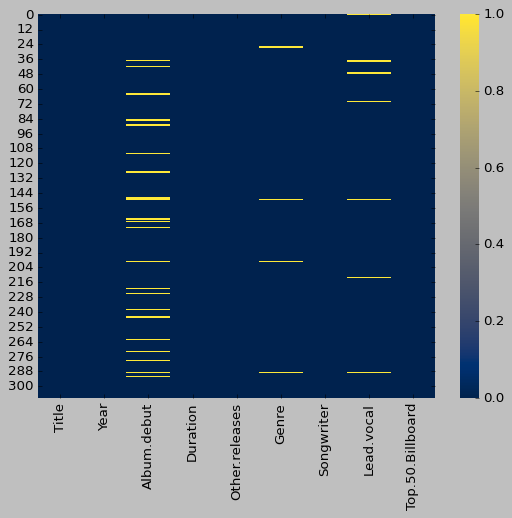

In [21]:
# Display the heatmap (missing values) of The Beatles songs dataset (demonstrate using sb.heatmap() vs. sb.heatmap();)
sb.heatmap(songs.isna(), cmap='cividis');

How many missing values are there? (`<pd.df>.isna().sum()` for all columns, `<pd.df>.['<column>'].isna().sum()` for a specific column, `<pd.df>.[['<column1>', 'column2', ...]].isna().sum()` for selected multiple columns; `isnull()` is the same as `isna()`, and `isna()` is used more often).

In [26]:
display(songs.isna().sum())
display(songs[['Album.debut', 'Genre']].isna().sum())

Title                0
Year                 0
Album.debut         22
Duration             0
Other.releases       0
Genre                4
Songwriter           0
Lead.vocal           8
Top.50.Billboard     0
dtype: int64

Album.debut    22
Genre           4
dtype: int64

### Examining individual data items, rows and columns
`<pd.df>.sample()`
Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
`<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

Take a sample of the dataset to get a feeling of what's in there.

In [27]:
songs.sample(10)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
149,Jessie's Dream,1967,NaN,150,0,NaN,"Lennon, McCartney, Harrison, Starkey",NaN,-1
287,Why Don't We Do It in the Road?,1968,The Beatles,102,8,"Rock, Blues, Pop/Rock",McCartney,McCartney,-1
258,The Honeymoon Song,1963,Live at the BBC,150,0,Pop/Rock,"Theodorakis, Sansom",McCartney,-1
125,I'll Follow the Sun,1964,UK: Beatles for Sale US: Beatles '65,106,17,"Folk Rock, Country, Pop/Rock",McCartney,"McCartney, with Lennon",-1
30,Blackbird,1968,The Beatles,139,12,"Folk, Pop/Rock",McCartney,McCartney,-1
52,Dig a Pony,1969,Let It Be,232,12,"Blues Rock, Pop/Rock",Lennon,Lennon,-1
19,Baby It's You,1963,UK: Please Please Me US: The Early Beatles,162,17,Pop/Rock,"Bacharach, David, Dixon",Lennon,-1
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
288,Wild Honey Pie,1968,The Beatles,52,7,"Experimental pop, Lo-Fi, Psychedelic Folk, Pop...",McCartney,McCartney,-1
181,Michelle,1965,Rubber Soul,160,19,Pop/Rock,"McCartney, with Lennon",McCartney,-1


What are the songs with missing `Album.debut` values?

Using `isna()`, `loc[]`, `iloc[]`, `len()` and `index`.

Calling `loc[]` effectively means *creating a subset* (typically based on a relational or logical expression over one or more columns of the dataset). In other words, `loc[]` creates a *slice* of the dataframe, so the type of the result is `<pd.df>`.
Note that `loc[]` works as `loc[<selected rows>, <selected columns>]`. The indices `<selected rows>` and `<selected columns>` can be created either directly in `loc[]` or beforehand.

Defining the relevant index with a statement like `<pd.df>.loc[<pd.df>['<column>'].isna()].index` is a good starting point when using `iloc[]` subsequently.
If using `iloc[]`, don't forget the `.index` chunk in the statement used to create the index (such as `<pd.df>.loc[<pd.df>['<column>'].isna()].index`). Without it, the result is another `<pd.df>`.

If defining the <selected rows> index to be used with `loc[]` subsequently, it is a good practice to define it as a boolean *mask* over a single column, like `<pd.df>['<column>'].isna()`, or as a logical expression in which each chunk is a relational expression over a single column, e.g. `<pd.df>['<column1>'].isna() & <pd.df>['<column2>'] < 23`. The result will be a subset of the original dataframe (i.e., another `<pd.df>`).

In [41]:
# Define i_iloc, the index to be used with iloc[]
# iloc[] can be used conveniently here if the relevant index is already defined with <pd.df>.loc[<pd.df>['<column>'].isna()].index;
# remember that the second index in iloc[] must be a number too (the relevant column index)
i_iloc = songs.loc[songs['Album.debut'].isna()].index
display(i_iloc)

# Define i_loc, the index (boolean mask) to be used with loc[]
i_loc = songs['Album.debut'].isna()
# display(i_loc.sample(10))
display(songs.loc[i_loc, ['Title', 'Album.debut']])

# display(songs.loc[i_loc.index, ['Title', 'Album.debut']])
# display(songs.loc[i_loc.index, ['Title', 'Album.debut']])
display(songs.iloc[i_iloc, [0, 2]])

Int64Index([ 37,  42,  64,  85,  89, 112, 127, 148, 149, 165, 167, 172, 199,
            221, 225, 238, 244, 262, 272, 279, 289, 292],
           dtype='int64')

,Title,Album.debut
37,Catswalk,NaN
42,Circles,NaN
64,Etcetera,NaN
85,Goodbye,NaN
89,Heather,NaN
112,I Lost My Little Girl,NaN
127,I'll Keep You Satisfied,NaN
148,Jazz Piano Song,NaN
149,Jessie's Dream,NaN
165,Looking Glass,NaN


,Title,Album.debut
37,Catswalk,NaN
42,Circles,NaN
64,Etcetera,NaN
85,Goodbye,NaN
89,Heather,NaN
112,I Lost My Little Girl,NaN
127,I'll Keep You Satisfied,NaN
148,Jazz Piano Song,NaN
149,Jessie's Dream,NaN
165,Looking Glass,NaN


Replace `NaN` values in `Album.debut` with 'No' (these songs have not appeared on any of the official albums).

In [42]:
# Make the replacement and display it
songs.loc[i_loc, 'Album.debut'] = 'No'
display(songs.loc[i_loc, ['Title', 'Album.debut']])

,Title,Album.debut
37,Catswalk,No
42,Circles,No
64,Etcetera,No
85,Goodbye,No
89,Heather,No
112,I Lost My Little Girl,No
127,I'll Keep You Satisfied,No
148,Jazz Piano Song,No
149,Jessie's Dream,No
165,Looking Glass,No


Double-check the missing values now:

In [44]:
# Use <pd.df>.isna().sum() or sb.heatmap(<pd.df>.isna(), cmap='...')
songs.isna().sum()

Title               0
Year                0
Album.debut         0
Duration            0
Other.releases      0
Genre               4
Songwriter          0
Lead.vocal          8
Top.50.Billboard    0
dtype: int64

How many songs from The Beatles early years are there?

In [48]:
# Define early years using a list comprehension
early_years = [y for y in range(1958, 1963)]
# Display the songs from the early years using a combination of <pd.df>.loc[] and isin()
display(songs.loc[songs.Year.isin(early_years)])

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
7,Ain't She Sweet,1961,Anthology 1,150,9,Pop/Rock,"Yellen, Ager",Lennon,41
18,Ask Me Why,1962,UK: Please Please Me US: The Early Beatles,144,24,Pop/Rock,"Lennon, with McCartney",Lennon,-1
33,Bésame Mucho,1962,Anthology 1,150,0,Bolero,"Velázquez, Skylar",McCartney,-1
37,Catswalk,1962,No,150,0,Pop/Rock,McCartney,NaN,-1
38,Cayenne,1960,Anthology 1,144,0,"Instrumental Rock, Pop/Rock",McCartney,NaN,-1
47,Cry for a Shadow,1961,Anthology 1,140,0,"Instrumental Rock, Pop/Rock",Lennon and Harrison,NaN,-1
87,"Hallelujah, I Love Her So",1960,Anthology 1,155,0,"Blues, Jazz, R&B, Pop/Rock",Charles,McCartney,-1
90,Hello Little Girl,1962,Anthology 1,150,0,"Merseybeat, Pop/Rock",Lennon,Lennon,-1
103,How Do You Do It?,1962,Anthology 1,119,0,"Merseybeat, Pop/Rock",Murray,Lennon,-1
112,I Lost My Little Girl,1962,No,105,0,"Rock, R&B, Pop/Rock",McCartney,Lennon,-1


### Grouping and sorting data
`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
`<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
`<pd.df>.sort_values(by='<column name>', ascending=False/True)`
`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
`<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


How many unique values for `Year` are there in the dataset (`<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`)?

In [51]:
display(songs.Year.unique())
display(songs.Year.nunique())

array([1965, 1967, 1964, 1963, 1968, 1961, 1969, 1966, 1962, 1960, 1977,
       1970, 1958, 1980], dtype=int64)

14

Group the songs in the dataset by the year of release (`<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`). The result can be `songs_by_year`. Display it, show its type, and explore its individual groups and their types.

In [52]:
songs_by_year = songs.groupby('Year')
display(songs_by_year)

How many songs are there in the dataset for each `Year` (`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts()[<year>]`, `<pd.df>['<column>'].value_counts().sort_index()`)?

In [57]:
display(songs['Year'].value_counts())
display(songs['Year'].value_counts().sort_values())
display(songs['Year'].value_counts().sort_index())

1963    66
1968    45
1969    43
1964    41
1965    37
1967    27
1962    20
1966    19
1960     4
1961     3
1958     2
1977     1
1970     1
1980     1
Name: Year, dtype: int64

1977     1
1970     1
1980     1
1958     2
1961     3
1960     4
1966    19
1962    20
1967    27
1965    37
1964    41
1969    43
1968    45
1963    66
Name: Year, dtype: int64

1958     2
1960     4
1961     3
1962    20
1963    66
1964    41
1965    37
1966    19
1967    27
1968    45
1969    43
1970     1
1977     1
1980     1
Name: Year, dtype: int64

Sort the songs from the dataset by the year of release (`<pd.df>.sort_values(by='<column name>', ascending=False/True)`).
(It is also possible to use `inplace=True` in `sort_values()`, but it will change the order of songs in the dataset from that point on.)

In [58]:
songs.sort_values(by='Year', ascending=False)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
210,Real Love,1980,Anthology 2,236,2,"Rock, Pop/Rock","Lennon, with McCartney, Harrison, Starkey",Lennon,47
73,Free as a Bird,1977,Anthology 1,266,0,"Rock, Pop/Rock","Lennon, with McCartney, Harrison and Starkey","Lennon, McCartney and Harrison",39
113,I Me Mine,1970,Let It Be,145,10,"Folk blues, Hard Rock, Pop/Rock",Harrison,Harrison,-1
245,Taking a Trip to Carolina,1969,Let It Be... Naked - Fly on the Wall bonus disc,150,0,Pop/Rock,Starkey,Starkey,-1
76,Get Back,1969,Let It Be,194,28,"Blues Rock, Pop/Rock",McCartney,McCartney,4
...,...,...,...,...,...,...,...,...,...
38,Cayenne,1960,Anthology 1,144,0,"Instrumental Rock, Pop/Rock",McCartney,NaN,-1
304,You'll Be Mine,1960,Anthology 1,98,0,"R&B, Experimental, Pop/Rock",Lennon and McCartney,McCartney,-1
87,"Hallelujah, I Love Her So",1960,Anthology 1,155,0,"Blues, Jazz, R&B, Pop/Rock",Charles,McCartney,-1
144,In Spite of All the Danger,1958,Anthology 1,164,0,"Skiffle, Blues, Rock and Roll, Pop/Rock",McCartney and Harrison,Lennon,-1


Group the songs in the dataset by the year of release and display `mean` and/or `max` duration of the songs in each year, as well as the number (`count`) of songs in each year (`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`), `<pd.df>.groupby('<column>').<another column>.agg(['f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`, `max()`,...)).
If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.

In [61]:
display(songs_by_year.Duration.mean())
display(songs_by_year.Duration.mean().sort_values(ascending=False))
display(songs_by_year.Duration.agg(['count', 'min', 'max']).sort_values(by='count', ascending=False))

Year
1958    150.000000
1960    136.750000
1961    146.666667
1962    140.900000
1963    136.045455
1964    144.048780
1965    149.189189
1966    157.473684
1967    196.666667
1968    194.511111
1969    169.255814
1970    145.000000
1977    266.000000
1980    236.000000
Name: Duration, dtype: float64

Year
1977    266.000000
1980    236.000000
1967    196.666667
1968    194.511111
1969    169.255814
1966    157.473684
1958    150.000000
1965    149.189189
1961    146.666667
1970    145.000000
1964    144.048780
1962    140.900000
1960    136.750000
1963    136.045455
Name: Duration, dtype: float64

,count,min,max
Year,,,
1963,66,92,182
1968,45,52,502
1969,43,23,467
1964,41,106,183
1965,37,115,202
1967,27,80,388
1962,20,105,156
1966,19,121,245
1960,4,98,155


### Data visualization
Plot some scatterplots, line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the surface).

##### Scatterplot

Read a slightly different dataset.

In [62]:
# Get the songs as a pd.DataFrame object from 'data/The Beatles songs dataset, v2.csv'
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')

Check for missing values (use, e.g., `sb.heatmap(<pd.df>.isna(), cbar=False, cmap='viridis')`).

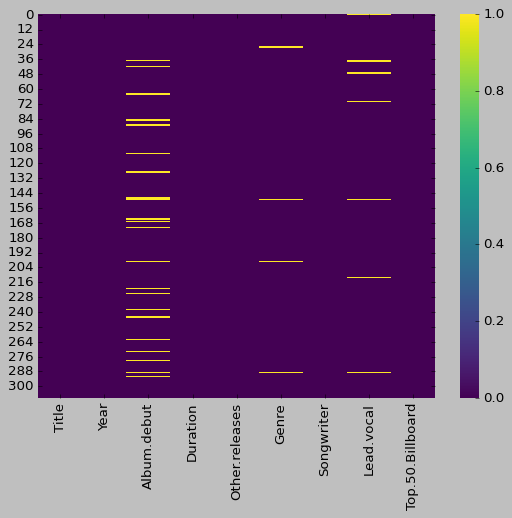

In [63]:
sb.heatmap(songs.isna(), cmap='viridis');

Scatterplot the relationship between `Duration` and `Other.releases`.

To set the ranges of values on x-axis and y-axis (`Duration`, `Other.releases`), check the max values or run `describe()`.

In [65]:
songs.describe()

,Year,Duration,Other.releases,Top.50.Billboard
count,310.000000,310.000000,310.000000,310.000000
mean,1965.429032,159.645161,10.422581,3.158065
std,2.721090,53.995774,10.197665,11.215635
min,1958.000000,23.000000,0.000000,-1.000000
25%,1963.000000,133.000000,0.000000,-1.000000
50%,1965.000000,150.000000,9.000000,-1.000000
75%,1968.000000,172.750000,16.000000,-1.000000
max,1980.000000,502.000000,56.000000,50.000000


###### 1. Matplotlib version

Use the following syntax:
`ax = plt.axes()`
`ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`
`ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<color>', edgecolors='<edgecolor>', s=<marker size>);`
The color parameter (`c`) is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `c` and `marker` have defaults. For other values of `c` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively. A good value for `s` is 30-40 for 200-300 markers on the plot.

Alternatively:
`ax.plot(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', color='<color>');`

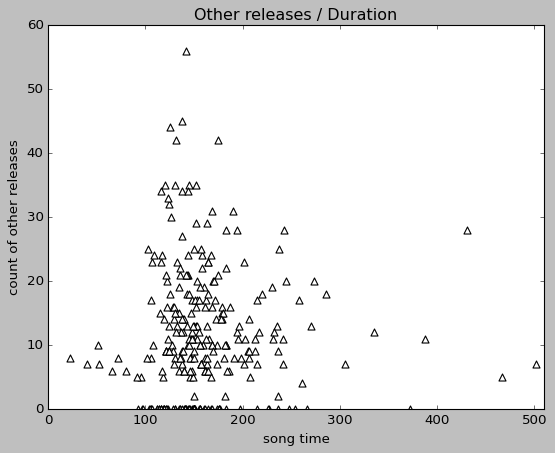

In [70]:
ax = plt.axes()
ax.set(xlim=(0, 510), ylim=(0, 60), xlabel='song time', ylabel='count of other releases', title='Other releases / Duration')
ax.scatter(songs['Duration'], songs['Other.releases'], c='white', edgecolors='black', s=40, marker = '^');

###### 2. Plotnine version
In *Plotnine*, the syntax for setting the ranges on x and y axes is `xlim(<from>, <to>)`, `ylim(<from>, <to>)`.

If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as `( ggplot(<df>, aes(x='<X>', y='<Y>) + geom_point(color='<color>', fill='<fill color>', shape='<shape>', size=<size>) + labs(x='...', y='...', title='...') ).draw();`.
The `color`, `fill` and `shape` parameters have defaults. The other values of these parameters are the same as in Matplotlib (see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively).

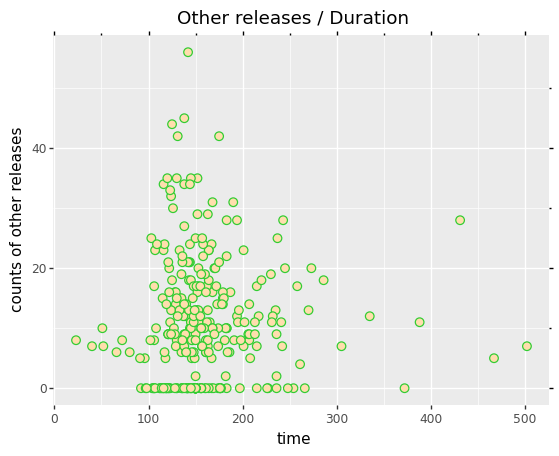

In [72]:
(
    ggplot(songs, aes(x='Duration', y='Other.releases')) +
    geom_point(color='limegreen', fill='navajowhite', shape='o', size=3) +
    labs(x='time', y='counts of other releases', title='Other releases / Duration')
).draw();

###### 3. A brief analysis of the plot: What are the shortest/longest songs and their durations?

In [76]:
# display(<pd.df>['column'] <= <value>)                                    # Boolean mask
# display(type(<pd.df>['column'] <= <value>))                              # pd.Series
# display(<pd.df>[<pd.df>['column'] <= <value>]['column to to display'])   # select one column
# display(<pd.df>[<pd.df>['column'] <= <value>]['column 1  to to display', 'column 2 to display',...])   # select multiple columns

# Try this also with .loc[], as well as with an explicitly set index and with .index
long = songs['Duration'] > 400
display(songs.loc[long, ['Title', 'Duration']].sort_values(by='Duration', ascending=False))
short = songs['Duration'] < 100
display(songs.loc[short, ['Title', 'Duration']].sort_values(by='Duration'))

,Title,Duration
212,Revolution 9,502
120,I Want You (She's So Heavy),467
98,Hey Jude,431


,Title,Duration
94,Her Majesty,23
173,Maggie Mae,40
53,Dig It,51
288,Wild Honey Pie,52
179,Mean Mr. Mustard,66
208,Polythene Pam,72
223,Sgt. Pepper's Lonely Hearts Club Band (Reprise),80
81,Golden Slumbers,91
132,I'm In Love,92
36,Carry That Weight,96


##### Line plot

How many songs from 1964 are there?

In [79]:
# Use <pd.df>['<column>'].value_counts(), <pd.df>['<column>'].value_counts()[<specific value> in <column>]
display(songs.Year.value_counts())
display(songs.Year.value_counts()[1964])

1963    66
1968    45
1969    43
1964    41
1965    37
1967    27
1962    20
1966    19
1960     4
1961     3
1958     2
1977     1
1970     1
1980     1
Name: Year, dtype: int64

41

Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [81]:
# Define val_counts_sorted_by_index
val_counts_sorted_by_index = songs.Year.value_counts().sort_index()
val_counts_sorted_by_index

1958     2
1960     4
1961     3
1962    20
1963    66
1964    41
1965    37
1966    19
1967    27
1968    45
1969    43
1970     1
1977     1
1980     1
Name: Year, dtype: int64

Preparation for plotting (`counts` on y-axis, `year` on x-axis): get the `ndarray` version of `val_counts_sorted_by_index` using `np.array()`, as well as of `val_counts_sorted_by_index.index`.

In [83]:
years = val_counts_sorted_by_index.index
# years
counts = val_counts_sorted_by_index.values
# counts

array([ 2,  4,  3, 20, 66, 41, 37, 19, 27, 45, 43,  1,  1,  1],
      dtype=int64)

And now plot it.

###### 1. Matplotlib version
`ax = plt.axes()`
`ax.set(xlim=(<lower limit>, <upper limit>), ylim=(<lower limit>, <upper limit>), xlabel='...', ylabel='...', title='...')`
`ax.plot(<x>, <y>, color='...', marker='<marker type>', linewidth=<number>, alpha=<number>)`
Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

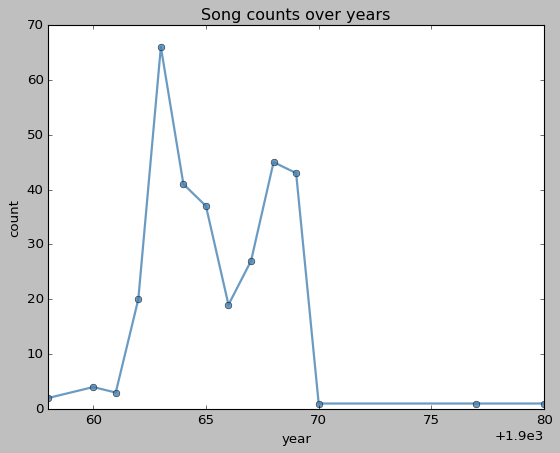

In [86]:
ax = plt.axes()
ax.set(xlim=(years.min(), years.max()), ylim=(0, 70), xlabel='year', ylabel='count', title='Song counts over years')
ax.plot(years, counts, color='steelblue', linewidth=2, marker='o', alpha=0.8);

###### 2. Plotnine version
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

For some reasons, running the Matplotlib version immediately before running the Plotnine version sometimes resets all values in `year` to 1970 (!!!), so re-creating `year` here might be necessary.

In [ ]:
# year = np.array(val_counts_sorted_by_index.index)
# display(year)


If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

In [88]:
df = pd.DataFrame({'Year': years, 'Count': counts})

Use `ggplot` as `( ggplot(<df>, aes(<x> = '<X>', <y> = '<Y>) + geom_line(color='<color>', size=<size>, alpha=<transparency, 0-1>, linetype='<linetype>')+ labs(x='...', y='...') ).draw();`).
Examples of parameters in `geom_line()`: `color='steelblue'`, `size=1`, `linetype='solid'`, `alpha=0.8` (alpha: transparency (0-1)).


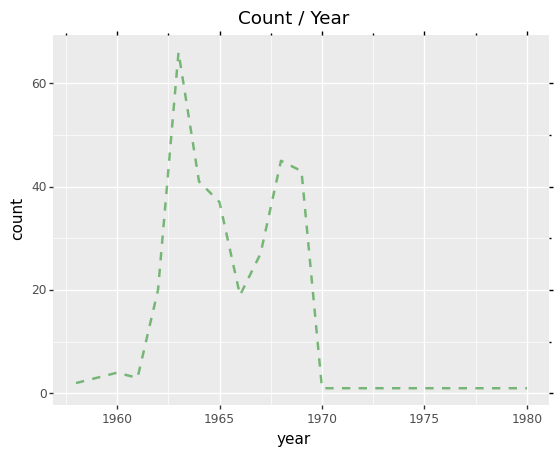

In [89]:
(
    ggplot(df, aes(x='Year', y='Count')) +
    geom_line(linetype='--', size=1, color='green', alpha=0.5) +
    labs(x='year', y='count', title='Count / Year')
).draw();

###### 3. Smoothen the curves
Based on [this](https://stackoverflow.com/a/5284038/1899061).
`from scipy.interpolate import make_interp_spline, BSpline`

`<x> = <definition of x-axis variable>`
`<y> = <definition of y-axis variable>`

`<x_smooth> = np.linspace(<x>.min(), <x>max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`
`spl = make_interp_spline(year, counts, k=3)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; # type: BSpline
`<y_smooth> = spl(<x>_smooth)`

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`

`plt.plot(<x_smooth>, <y_smooth>)`
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well
`plt.show()`



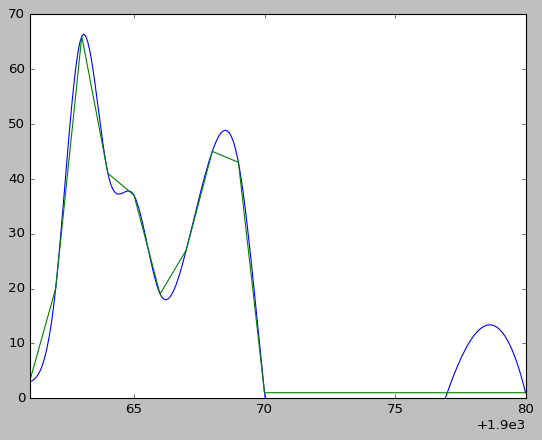

In [97]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

from scipy.interpolate import make_interp_spline, BSpline

year_smooth = np.linspace(years.min(), years.max(), 300)
spl = make_interp_spline(years, counts, k=3)  # type: BSpline
counts_smooth = spl(year_smooth)

plt.xlim([1961, 1980])
plt.ylim([0, 70])

plt.plot(year_smooth, counts_smooth)
plt.plot(years, counts)
plt.show();

# # Alternatively
# ax = plt.axes()
# ax.set(xlim=(years.min(), years.max()), ylim=(0, 70), xlabel='year', ylabel='count', title='Song counts over years')
# ax.plot(years, counts, color='steelblue', linewidth=2, marker='o', alpha=0.8)
# ax.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8);

###### 4. Multiple subplots
(shown here after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html))

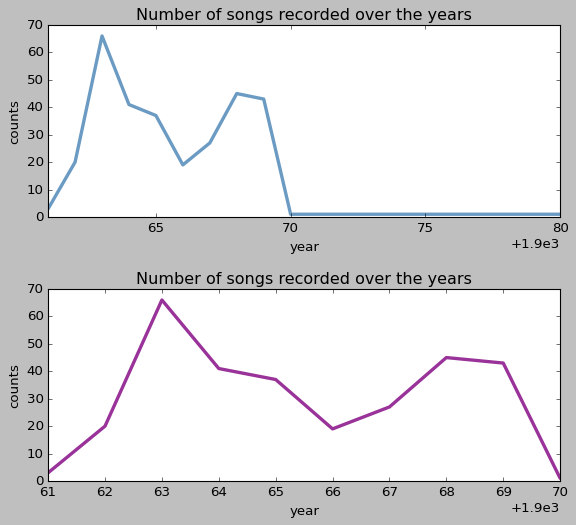

In [99]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# #     0.1 - distance from the left edge of fig (grey area)
# #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# #     0.8 - distance from the right edge of fig (grey area)
# #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # Experiment with these numbers to get a better feeling for them
#
# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));


# fig, ax = plt.subplots()
# ax

fig = plt.figure()
# fig
ax1 = fig.add_axes([0.1, 0.65, 0.8, 0.4],
                   xlim=(1961, 1980), ylim=(0, 70),
                   xlabel='year', ylabel='counts',
                   title='Number of songs recorded over the years')
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xlim=(1961, 1970), ylim=(0, 70),
                   xlabel='year', ylabel='counts',
                   title='Number of songs recorded over the years')
# display(type(ax1))

ax1.plot(years, counts, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
ax2.plot(years, counts, color='purple', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

##### Histogram

Use Pandas to extract song lengths as a `pd.Series` object (`<pd.Series object> = <pd.df>['<column>']`).

In [100]:
# Get the song lengths as a pd.Series object
lengths = songs.Duration

In [101]:
# Convert the song lengths into a NumPy array (using <song lengths>.values)
times = np.array(lengths)

###### 1. Matplotlib version
Plot the histogram of the song lengths using Matplotlib.

Minimal version: `plt.hist(<x>, <number of bins>);`
Alternatively:
`ax = plt.axes()`
`ax.set(xlabel='...', ylabel='...', title='...')`
`ax.hist(<x>, <number of bins>)`

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme()` (or just `sb.set()`, but that function might get deprecated and removed from *Seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults.

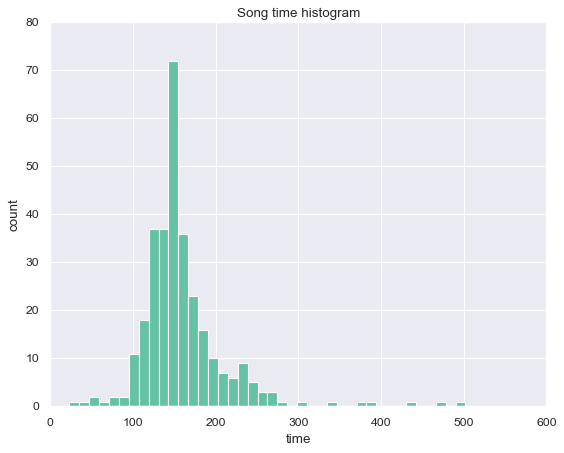

In [103]:
# Set plot style using sb.set_theme()
sb.set_theme(palette='Set2')
# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins
ax = plt.axes()
ax.set(xlabel='time', ylabel='count', title='Song time histogram')
ax.hist(times, bins=40);

###### 2. Plotnine version
Plot the histogram of the song lengths using *Plotnine*.

A minimal, but effective version:
`plot = ggplot(songs, aes(x='<x>'))`
`plot + geom_histogram(bins=40)`

A more detailed version:
`( ggplot(songs, aes(x='<x>')) + geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) + labs(x='<x>', y='count', title='<title>') ).draw();`.

[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

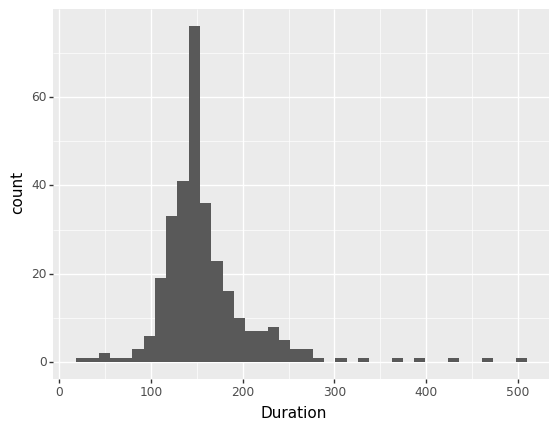

<ggplot: (102830788864)>

In [104]:
plot = ggplot(songs, aes(x='Duration'))
plot + geom_histogram(bins=40)


To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax:
`( ggplot(songs, aes(x='<x>')) + geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) + labs(x='<x>', y='count', title='<title>') ).draw();`.

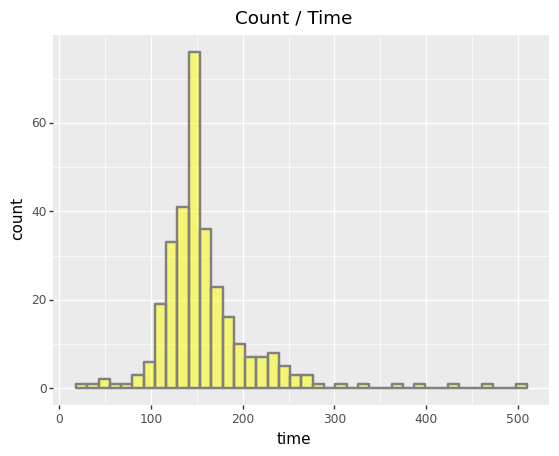

In [105]:
(
    ggplot(songs, aes(x='Duration')) +
    geom_histogram(bins=40, color='grey', fill='yellow', alpha=0.5, size=1) +
    labs(x='time', y='count', title='Count / Time')
).draw();

##### Bar graph

How many Beatles songs have reached Billboard Top 50?

Read the dataset ('data/The Beatles songs dataset, v2.csv') and make some minor transformations.

In [122]:
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')

Add another column, `Top50`: a song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

In [123]:
songs['Top50'] = 'No'

Create the index of the songs that HAVE reached Billboard Top 50: `i = songs.loc[songs['Top.50.Billboard'] != -1].index` or `i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)`.

In [124]:
t50 = songs['Top.50.Billboard'] != -1

Change the values of `Top50` corresponding to the created index to `Yes`.

In [125]:
songs.loc[t50, 'Top50'] = 'Yes'

Check if the newly added `Top50` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['Top.50.Billboard'] != -1].index` directly.

In [126]:
display(songs.loc[t50, ['Title', 'Top50']])

,Title,Top50
2,A Hard Day's Night,Yes
6,Act Naturally,Yes
7,Ain't She Sweet,Yes
12,All You Need Is Love,Yes
13,And I Love Her,Yes
21,"Baby, You're a Rich Man",Yes
34,Can't Buy Me Love,Yes
45,Come Together,Yes
49,Day Tripper,Yes
55,Do You Want to Know a Secret?,Yes


<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

In [127]:
songs.to_csv(('data/The Beatles songs dataset, v3.csv'))

###### Preparing the data for plotting the bar graph

Group the data - group the songs by the year of release.

In [128]:
songs_by_year = songs.groupby('Year')

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top50` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

In [137]:
display(songs_by_year.get_group(1966))
display(songs_by_year.get_group(1966).Top50.value_counts())
display(songs_by_year.get_group(1966).Top50.value_counts()['Yes'])

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard,Top50
14,And Your Bird Can Sing,1966,UK: Revolver US: Yesterday and Today,121,9,"Power Pop, Psychedelic Pop, Pop/Rock","Lennon, with McCartney",Lennon,-1,No
56,Doctor Robert,1966,UK: Revolver US: Yesterday and Today,135,6,"Psychedelic Rock, Power Pop, Pop/Rock","Lennon, with McCartney",Lennon,-1,No
63,Eleanor Rigby,1966,Revolver,128,16,"Baroque Pop, Art Rock, Pop/Rock",McCartney,McCartney,38,Yes
71,For No One,1966,Revolver,121,9,"Baroque Pop, Pop/Rock",McCartney,McCartney,-1,No
82,Good Day Sunshine,1966,Revolver,129,7,"Sunshine Pop, Music Hall, Pop/Rock",McCartney,McCartney,-1,No
86,Got to Get You into My Life,1966,Revolver,147,8,"R&B, Rock, Jazz Fusion, Pop/Rock",McCartney,McCartney,23,Yes
96,"Here, There and Everywhere",1966,Revolver,145,11,"Soft Rock, Pop/Rock",McCartney,McCartney,-1,No
119,I Want to Tell You,1966,Revolver,149,5,"Psychedelic Rock, Pop/Rock",Harrison,Harrison,-1,No
134,I'm Only Sleeping,1966,UK: Revolver US: Yesterday and Today,182,10,"Psychedelic Rock, Psychedelic Folk, Pop/Rock",Lennon,Lennon,-1,No
168,Love You To,1966,Revolver,181,8,"Indian Music, Raga Rock",Harrison,Harrison,-1,No


No     12
Yes     7
Name: Top50, dtype: int64

7

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year` column and then `np.sort()` the results.

In [136]:
years = np.sort(songs.Year.unique())
years

array([1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1977, 1980], dtype=int64)

For y-axis, create the lists of the numbers of the songs that have reached Billboard Top 50 (`in_top50`) and of those that haven't (`not_in_top50`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top50` column of the current year (`y['Top.50']`) to `in_top50` if any of `y['Top.50']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top50`. Display both lists in the end to double-check the result.)

In [138]:
in_top50 = []
not_in_top50 = []
for year in years:
    s = songs_by_year.get_group(year)
    in_top50.append(s.Top50.value_counts()['Yes'] if any(s['Top50'] == 'Yes') else 0)
    not_in_top50.append(s.Top50.value_counts()['No'] if any(s['Top50'] == 'No') else 0)
display(in_top50)
display(not_in_top50)

[0, 0, 2, 3, 6, 10, 7, 7, 3, 3, 6, 0, 1, 1]

[2, 4, 1, 17, 60, 31, 30, 12, 24, 42, 37, 1, 0, 0]

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, <u>and the sorted list of years created above as the index of the dataframe</u>.

In [139]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
df = pd.DataFrame({'In Top 50': in_top50, 'Not in Top 50': not_in_top50}, index=years)

Use `ax = <pd.df>.plot.bar()` to plot the bargraph. Relevant parameters: `rot=<rotation angle [degrees]>` for the x-axis labels, `ylim=(<from>, <to>)`, `color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}` (for a list of Matplotlib named colors, see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors)), `edgecolor='<color of bin lines>`, `title='<title>'`, `xlabel='<xlabel>'`, `ylabel='<ylabel>'`, `fontsize=<fontsize>` (for all text; suitable fontsizes are 10, 12,...), `stacked=True` (the bins for the same x-axis value stacked on top of one another). The returned value (`ax`) is usually unnecessary and can be omitted.

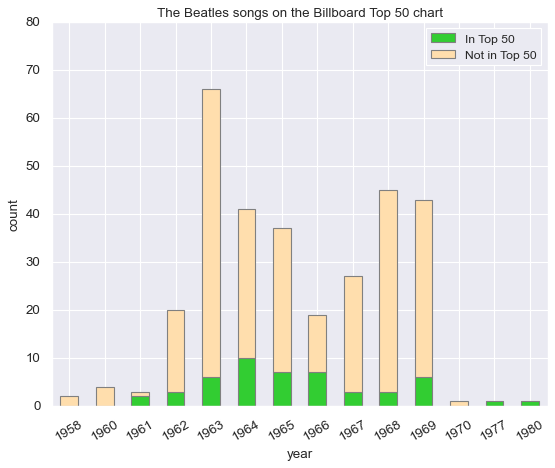

In [159]:
# df.plot.bar(title='The Beatles songs on the Billboard Top 50 chart', xlabel='year', ylabel='count', xlim=(years.min(), years.max()), ylim=(0, 80));
df.plot.bar(title='The Beatles songs on the Billboard Top 50 chart', xlabel='year', ylabel='count', xlim=(years.min(), years.max()), ylim=(0, 80), rot=30, color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}, edgecolor='grey', fontsize=12, stacked=True);

##### Box plot
Based on [this](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sns.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

Read the dataset ('data/The Beatles songs dataset, v2.csv').

In [160]:
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')

Use `sb.boxplot()` to plot some boxplots. For a single-column boxplot, relevant parameters are `y=<pd.df>['column']` (for 'vertical' boxplot) or `x=<pd.df>['column']` (for 'horizontal' boxplot), and `palette='palette'` (e.g., 'Set3', 'pastel', ...; see the links above for other named color palettes). For a single-column boxplot, relevant parameters are `data=<pd.df>[['column1', 'column2',...]]`, `orient='v'` (for 'vertical' boxplot) and `palette='palette'`.

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])

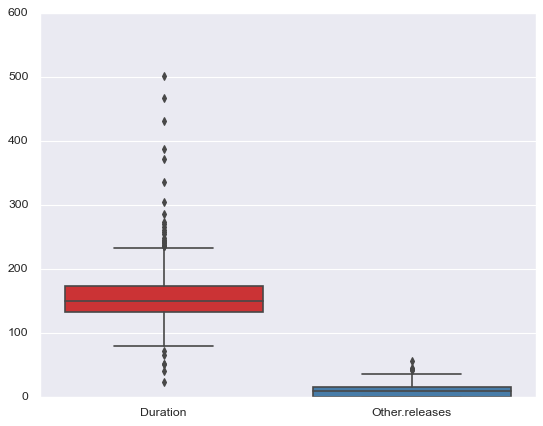

In [169]:
display(sb.palettes.SEABORN_PALETTES.keys())

# For a single column (e.g., Duration)
# sb.boxplot(x=songs.Duration, palette='Set1')

# For multiple columns (e.g., Other.releases and Duration)
# sb.boxplot(data=[songs['Duration'], songs['Other.releases']], palette='Set3', orient='v');
sb.boxplot(data=songs[['Duration', 'Other.releases']], palette='Set1', orient='v');

##### Violin plot
Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Read the dataset ('data/The Beatles songs dataset, v2.csv').

In [170]:
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')

Use `sb.violinplot()` like: `sb.violinplot(x=<pd.df>.loc[<selected indices for <column 1>, '<column 1>'], y=songs['<column 2>'], palette='Set3')`.

For example, if the violin plot should represent density/boxplot diagram of song `Duration` in certain `Year`s, then `<column 1>` is `Year` and `<column 2>` is `Duration`. Good values for `'<palette>'` are, e.g., 'Set3', 'pastel',...).

Try setting the index of selected observations both implicitly (directly in the `x` parameter) and explicitly (before the call to `sb.violinplot()`) and then using `x=<pd.df>.loc[<index>, '<column for x-axis>']`.

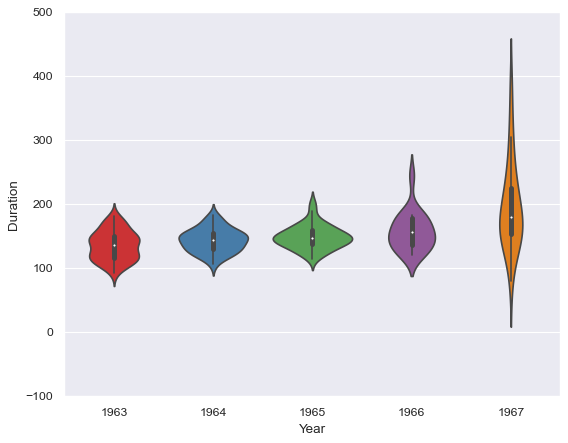

In [177]:
# sb.violinplot(y=songs.Duration);
years = (songs.Year >= 1963) & (songs.Year <= 1967)
sb.violinplot(x=songs.loc[years, 'Year'], y=songs.Duration, palette='Set1');

##### Heat map
Based on [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Read the dataset ('data/The Beatles songs dataset, v3.csv'). This dataset already has been saved when plotting the bar graph above, so it already has the `Top50` column.

In [178]:
songs = pd.read_csv('data/The Beatles songs dataset, v3.csv')

Categorize songs according to the number of other releases.
Insert a new column, e.g. `Other.releases.category` and set it to the default value `Medium`. Then split the range of `Other.releases` to five subranges, `very-Low` to `very_high` (find the `max()` of `Other.releases` first). Each such a subrange is actually an index of selected songs, based on the value of `Other.releases` (e.g., `very_low = songs['Other.releases'] < 10`). Then use `<pd.df>.loc[<index of selected observations>, <relevant column>]` to change the default value `Medium` where appropriate (e.g., `songs.loc[very_low, 'Other.releases.category'] = 'Very Low'`).

In [188]:
songs['Other.releases.category'] = 'Medium'

very_low = songs['Other.releases'] <= 10
low = (songs['Other.releases'] > 10) & (songs['Other.releases'] <= 20)
high = (songs['Other.releases'] > 30) & (songs['Other.releases'] <= 40)
very_high = songs['Other.releases'] > 40

songs.loc[very_low, 'Other.releases.category'] = 'Very Low'
songs.loc[low, 'Other.releases.category'] = 'Low'
songs.loc[high, 'Other.releases.category'] = 'High'
songs.loc[very_high, 'Other.releases.category'] = 'Very High'

display(songs[['Title', 'Other.releases.category']].sample(10))

,Title,Other.releases.category
234,So How Come (No One Loves Me),Very Low
22,Back in the U.S.S.R.,Low
307,You've Really Got a Hold on Me,Very Low
204,Penny Lane,Medium
150,Johnny B. Goode,Very Low
227,She Loves You,Very High
26,Because I Know You Love Me So,Very Low
297,Yesterday,High
19,Baby It's You,Low
30,Blackbird,Low


Rearrange the categories of `Other.releases.category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

In [189]:
songs['Other.releases.category'] = pd.Categorical(songs['Other.releases.category'], categories=['Very High', 'High', 'Medium', 'Low', 'Very Low'], ordered=True)

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values`: e.g. 'Duration'
- `index`: to be shown on y-axis, e.g. 'Other.releases.category'
- `columns`: to be shown on x-axis, e.g. 'Year'

In [190]:
s = songs.pivot_table(values='Duration', index='Other.releases.category', columns='Year')
# # Alternatively
# s = songs.pivot_table(values='Duration', index=['Very Low', 'Low', 'Medium', 'High', 'Very High'], columns='Year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).
It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).
Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use '.0f' to show int values in annotations, not scientific notation ('g' for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is 'icefire'

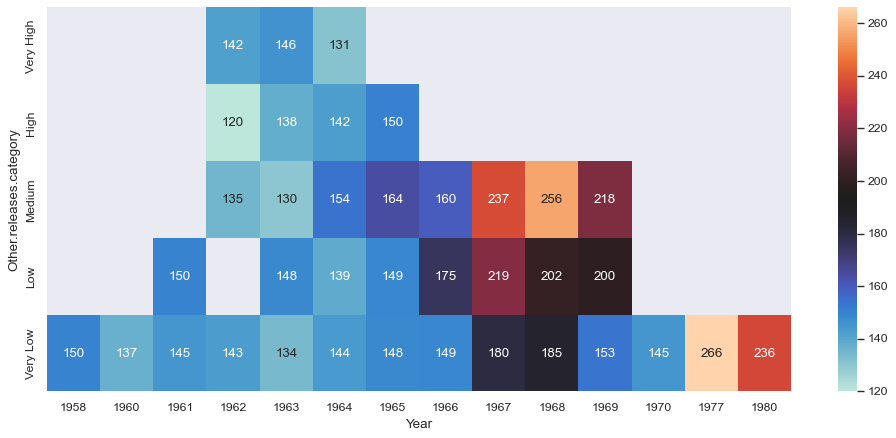

In [193]:
sb.set_theme(rc={'figure.figsize': (15, 6)})
sb.heatmap(data=s, annot=True, fmt='.0f', cmap='icefire');

##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs. Based on

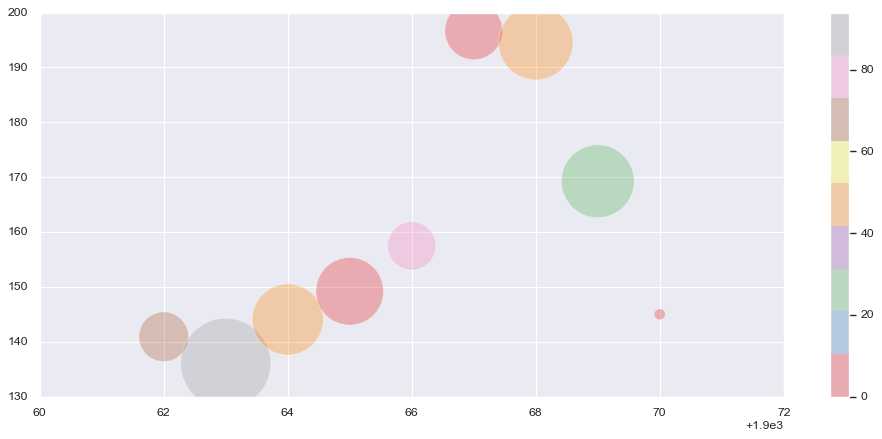

In [194]:
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))

avg_duration = []
for year in years_1962_1970:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
avg_duration = np.array(avg_duration)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)            # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                    # sizes proportional to the numbers of songs

plt.scatter(years_1962_1970, avg_duration,
            c=colors, s=sizes, alpha=0.3,                                     # alpha: the level of transparency
            cmap='Set1')                                                      # cmap: a pre-defined color map
plt.colorbar();                                                               # show color scale

## Masking - Boolean arrays as masks

A simple example.
Create a small `pd.Series` object (e.g., `a`) and a boolean mask as a list of the same length (e.g., `mask`) and show the effect of running `a[mask]`.

In [195]:
a = pd.Series([2, 5, 1, 7, 3])
m = [True, False, False, False, True]
display(a)
display(a[m])

0    2
1    5
2    1
3    7
4    3
dtype: int64

0    2
4    3
dtype: int64

An example from the 'data/The Beatles songs dataset, v2.csv' dataset.

Read the dataset.

In [207]:
songs = pd.read_csv('data/The Beatles songs dataset, v2.csv')

Extract song release years into a NumPy array (use the `values` attribute of the `Year` column).

In [209]:
years = songs.Year.values

Extract songs released after 1968.
Create a mask (a Boolean array of the same length as `Year`), `True` if the year is greater than 1968, and show a slice of it. It is a simple relational expression, no need for `.loc[]`.

In [211]:
m = years > 1968
display(m)
display(songs.loc[m, ['Title', 'Year']])

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,

,Title,Year
10,All Things Must Pass,1969
26,Because I Know You Love Me So,1969
27,Because,1969
36,Carry That Weight,1969
44,Come and Get It,1969
45,Come Together,1969
52,Dig a Pony,1969
53,Dig It,1969
59,Don't Let Me Down,1969
68,Fancy My Chances with You,1969


Get the titles of the first 10 songs released after 1968.
Use indexing with the mask created in the previous step.

In [212]:
# Get the titles of the first 10 songs such that years > 1968
display(songs.loc[m, 'Title'].head(10))

10             All Things Must Pass
26    Because I Know You Love Me So
27                          Because
36                Carry That Weight
44                  Come and Get It
45                    Come Together
52                       Dig a Pony
53                           Dig It
59                Don't Let Me Down
68        Fancy My Chances with You
Name: Title, dtype: object

Get the titles of the last 10 songs such that `years > 1968` and `times < 120`.
Create two simple masks, one for `Year` and another one for `Duration`, and use `&` in indexing the relevant observations in the dataframe. Remember to use the `values` attribute of both columns to convert the values to NumPy arrays.

In [215]:
# Get the titles of the last 10 songs such that years > 1968 and times < 120
times = songs.Duration.values < 120
# display(times)
display(songs.loc[m & times, 'Title'].tail(10))

36                           Carry That Weight
53                                      Dig It
81                             Golden Slumbers
94                                 Her Majesty
173                                 Maggie Mae
175            Mailman, Bring Me No More Blues
179                           Mean Mr. Mustard
208                              Polythene Pam
226    She Came in Through the Bathroom Window
Name: Title, dtype: object

Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths.
Create an appropriate mask for years, and use `np.mean()` to show the mean value of the lengths of the songs extracted using the mask.

In [220]:
y = (songs.Year.values == 1966) | (songs.Year.values == 1967)
display(songs.loc[y, 'Title'])
display(np.mean(songs.loc[y, 'Duration']))

1                                    A Day in the Life
11                                    All Together Now
12                                All You Need Is Love
14                              And Your Bird Can Sing
21                             Baby, You're a Rich Man
28                  Being for the Benefit of Mr. Kite!
31                                        Blue Jay Way
41                      Christmas Time (Is Here Again)
56                                       Doctor Robert
63                                       Eleanor Rigby
69                                       Fixing a Hole
70                                              Flying
71                                          For No One
77                                      Getting Better
82                                   Good Day Sunshine
83                          Good Morning, Good Morning
86                         Got to Get You into My Life
91                                      Hello, Goodbye
96        

180.47826086956522

## Fancy indexing
Fancy indexing is like simple indexing, but arrays of indices are passed in place of single scalars.

Create an array of 10 random integers (using `np.random.seed(<seed>)`, `<array> = np.random.randint(10, size=10)`) and a list of a couple of indices to select the relevant values from the array. Try also changing the values at these indices only.

In [225]:
np.random.seed(12)
a = np.random.randint(1, 10, 10)
display(a)
b = [1, 5, 8]
display(a[b])

array([7, 2, 3, 4, 4, 1, 7, 2, 5, 6])

array([2, 1, 5])

## Sorting arrays

Create an `np.array` of `int` values and demonstrate that `np.sort(<np.array>)` does not change the array, whereas the `<np.array>.sort()` does (inplace sorting).

In [230]:
np.random.seed(12)
a = np.random.randint(1, 10, 10)
display(a)
display(np.sort(a))
display(a)
display(a.sort())
display(a)

array([7, 2, 3, 4, 4, 1, 7, 2, 5, 6])

array([1, 2, 2, 3, 4, 4, 5, 6, 7, 7])

array([7, 2, 3, 4, 4, 1, 7, 2, 5, 6])

None

array([1, 2, 2, 3, 4, 4, 5, 6, 7, 7])

The `np.argsort()` function returns the *indices* that would sort an array.

What are the longest and the shortest Beatles songs?

Read the dataset, 'data/The Beatles songs dataset, v1.csv'.

In [ ]:
songs = pd.read_csv('data/The Beatles songs dataset, v1.csv')

Extract `times` - song durations - from the `values` attribute of the `Duration` column and pass it to `np.argsort()` to get the index that sorts the song times in the ascending order. To sort in descending order, use `(-<np.array>).argsort()` or `<index> = np.argsort(-<np.array>)` (see [this](https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order)).
Use the index created that way to print the titles and the durations of, e.g., ten longest songs and ten shortest songs. It boils down to fancy indexing the `Title` and `Duration` columns with the index created that way.

In [236]:
times = songs.Duration
i = np.argsort(-times)
# display(i)
display(songs.loc[i, ['Title', 'Duration']].head(10))

,Title,Duration
212,Revolution 9,502
120,I Want You (She's So Heavy),467
98,Hey Jude,431
146,It's All Too Much,388
283,What's The New Mary Jane,372
1,A Day in the Life,335
291,Within You Without You,305
286,While My Guitar Gently Weeps,286
104,I Am the Walrus,273
93,Helter Skelter,270
